<a href="https://colab.research.google.com/github/camillyjulia/graficos-tb/blob/main/graficos_tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

In [ ]:
planilha = pd.read_excel('/content/drive/MyDrive/gráficos tb/transf. grafico.xlsx')
planilha.head()

,Nome,Nº Caso,DN,Município origem,Município destino,Desfecho da Transferência,Nº SINAN (na origem),Nº SINAN (no destino),Observações
0,ZAQUEL RIBEIRO,t001/23,1979-10-18 00:00:00,Porto Alegre,Mostardas,NaN,2743513,NaN,não encontrado notificação de destino
1,LUANA NASCIMENTO VIEGAS,t002/23,2001-11-29 00:00:00,Porto Alegre,Gravataí,deu entrada,2742292,3031892,caso encerrado como cura
2,ALCI FERNANDES,t003/23,1952-07-21 00:00:00,Porto Alegre,Uruguaiana,deu entrada,2743339,2829960,caso encerrado como cura
3,JOAO ANTONIO DOS SANTOS,t004/23,1955-03-09 00:00:00,Porto Alegre,Viamão,NaN,NaN,NaN,mudança de diagnóstico
4,ALICE GONCALVES DA ROCHA,t005/23,2022-06-14 00:00:00,Porto Alegre,São Leopoldo,deu entrada,2740765,2838176,caso encerrado como cura


In [ ]:
planilha_nova = planilha.drop(columns = {'Nome','Nº Caso', 'DN', 'Observações'})
planilha_nova

,Município origem,Município destino,Desfecho da Transferência,Nº SINAN (na origem),Nº SINAN (no destino)
0,Porto Alegre,Mostardas,NaN,2743513,NaN
1,Porto Alegre,Gravataí,deu entrada,2742292,3031892
2,Porto Alegre,Uruguaiana,deu entrada,2743339,2829960
3,Porto Alegre,Viamão,NaN,NaN,NaN
4,Porto Alegre,São Leopoldo,deu entrada,2740765,2838176
...,...,...,...,...,...
627,Bagé,Viamão,deu entrada,3022394,NaN
628,Alvorada,Gravataí,NaN,NaN,NaN
629,Porto Alegre,Viamão,deu entrada,3135963,NaN
630,São Leopoldo,Porto Alegre,deu entrada,3017801,NaN


In [ ]:
planilha_renom = planilha_nova.rename(columns = {'Município origem' : 'Município de origem', 'Município destino' : 'Município de destino', 'Desfecho da Transferência' : 'Desfecho', 'Nº SINAN (na origem)' : 'Notificação na origem', 'Nº SINAN (no destino)' : 'Notificação no destino'})
planilha_renom

,Município de origem,Município de destino,Desfecho,Notificação na origem,Notificação no destino
0,Porto Alegre,Mostardas,NaN,2743513,NaN
1,Porto Alegre,Gravataí,deu entrada,2742292,3031892
2,Porto Alegre,Uruguaiana,deu entrada,2743339,2829960
3,Porto Alegre,Viamão,NaN,NaN,NaN
4,Porto Alegre,São Leopoldo,deu entrada,2740765,2838176
...,...,...,...,...,...
627,Bagé,Viamão,deu entrada,3022394,NaN
628,Alvorada,Gravataí,NaN,NaN,NaN
629,Porto Alegre,Viamão,deu entrada,3135963,NaN
630,São Leopoldo,Porto Alegre,deu entrada,3017801,NaN


In [ ]:
planilha_renom['Município de origem'] = planilha_renom['Município de origem'].str.strip()

n_mun_origem = planilha_renom.groupby(planilha_renom['Município de origem'].str.title()).size().reset_index(name = 'Contagem')

In [ ]:
planilha_renom['Município de destino'] = planilha_renom['Município de destino'].str.strip()

n_mun_destino = planilha_renom.groupby(planilha_renom['Município de destino'].str.title()).size().reset_index(name = 'Contagem')

In [ ]:
top_10_municipios_destino = n_mun_destino.sort_values(by = 'Contagem', ascending = False).head(20)

print(top_10_municipios_destino)

    Município de destino  Contagem
2               Alvorada        75
96          Porto Alegre        63
145               Viamão        57
24                Canoas        34
61              Gravataí        31
20          Cachoeirinha        23
33           Charqueadas        21
126         São Leopoldo        19
81            Montenegro        15
66                Guaíba        15
87         Novo Hamburgo        13
45       Eldorado Do Sul        11
93           Passo Fundo         9
116      Sapucaia Do Sul         9
25        Capão Da Canoa         7
128         São Paulo/Sp         7
28         Caxias Do Sul         7
88                Osório         7
135            Tramandaí         7
70                  Imbé         6


In [ ]:
top_10_municipios = n_mun_origem.sort_values(by = 'Contagem', ascending=False).head(10)
print(top_10_municipios)

   Município de origem  Contagem
49        Porto Alegre       375
14              Canoas        35
58         Santa Maria        15
68        São Leopoldo        14
46         Passo Fundo        13
61     Sapucaia Do Sul        12
28            Gravataí        12
81              Viamão         9
16       Caxias Do Sul         9
1             Alvorada         9


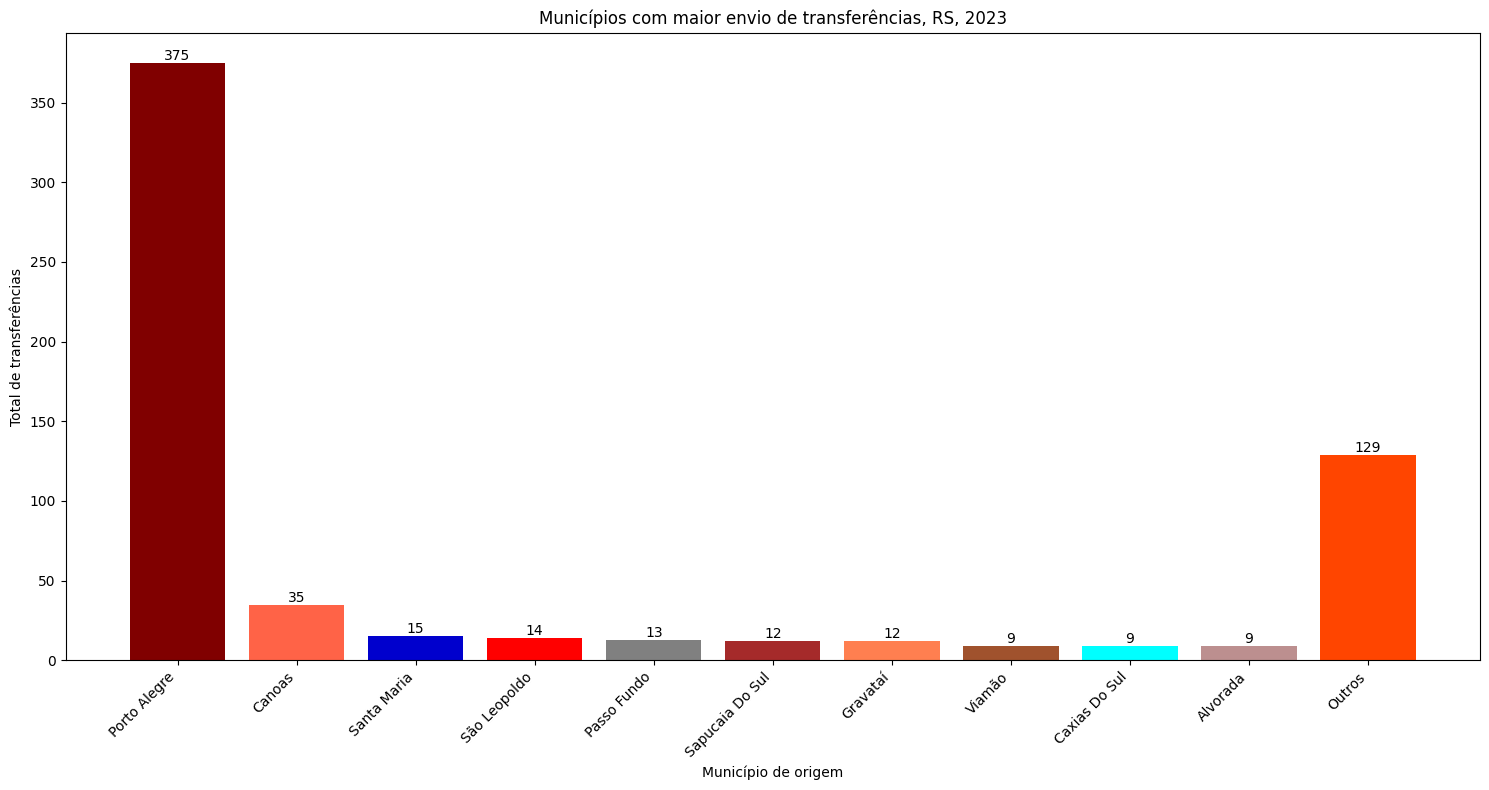

In [ ]:
total_transferencias = len(planilha_renom)

contagem_outros = total_transferencias - top_10_municipios['Contagem'].sum()

outros = pd.DataFrame({'Município de origem': ['Outros'], 'Contagem': [contagem_outros]})

top_origem_com_outros = pd.concat([top_10_municipios, outros])

cores_escolhidas = ['maroon', 'tomato', 'mediumblue', 'red', 'gray', 'brown', 'coral', 'sienna', 'cyan', 'rosybrown', 'orangered']

plt.figure(figsize = (15, 8))
bars = plt.bar(top_origem_com_outros['Município de origem'], top_origem_com_outros['Contagem'], color = cores_escolhidas)
plt.title('Municípios com maior envio de transferências, RS, 2023')
plt.xlabel('Município de origem')
plt.ylabel('Total de transferências')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom', fontsize = 10)

plt.show()

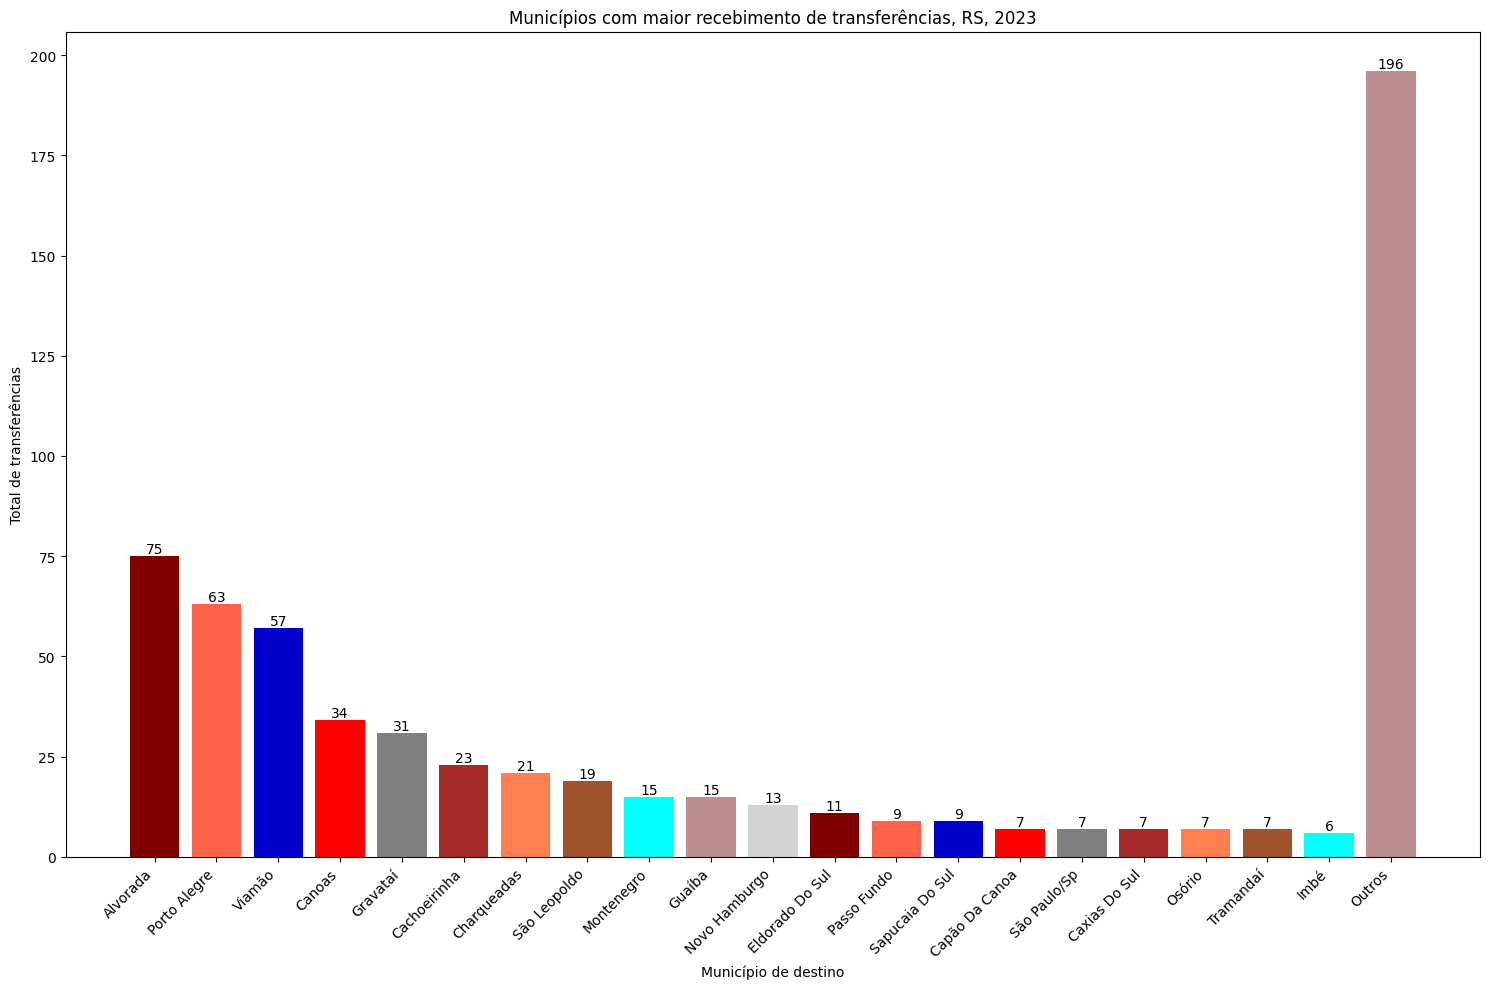

In [ ]:
total_transferencias_destino = len(planilha_renom)

contagem_outros = total_transferencias_destino - top_10_municipios_destino['Contagem'].sum()

outros = pd.DataFrame({'Município de destino': ['Outros'], 'Contagem': [contagem_outros]})

top_destino_com_outros = pd.concat([top_10_municipios_destino, outros])

cores_escolhidas_destino = ['maroon', 'tomato', 'mediumblue', 'red', 'gray', 'brown', 'coral', 'sienna', 'cyan', 'rosybrown', 'lightgray']

plt.figure(figsize = (15, 10))
bars = plt.bar(top_destino_com_outros['Município de destino'], top_destino_com_outros['Contagem'], color = cores_escolhidas_destino)
plt.title('Municípios com maior recebimento de transferências, RS, 2023')
plt.xlabel('Município de destino')
plt.ylabel('Total de transferências')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center', va = 'bottom', fontsize = 10)

plt.show()

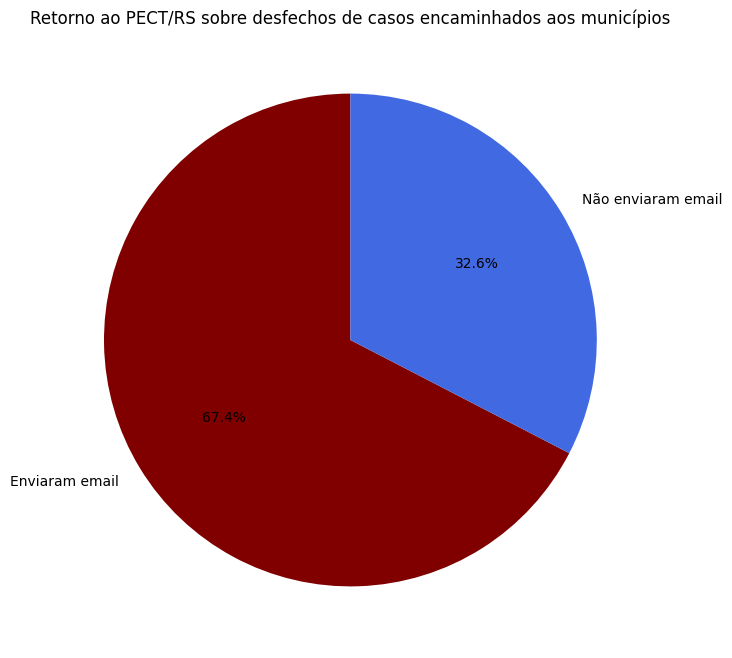

In [ ]:
planilha_renom['Responderam'] = planilha_renom['Desfecho'].notna()

contagem_responderam = planilha_renom['Responderam'].value_counts()

rotulos = ['Enviaram email', 'Não enviaram email']

cores = ['maroon', 'royalblue']

plt.figure(figsize = (8, 8))
plt.pie(contagem_responderam, labels = rotulos, autopct = '%1.1f%%', colors = cores, startangle = 90)
plt.title('Retorno ao PECT/RS sobre desfechos de casos encaminhados aos municípios')
plt.show()

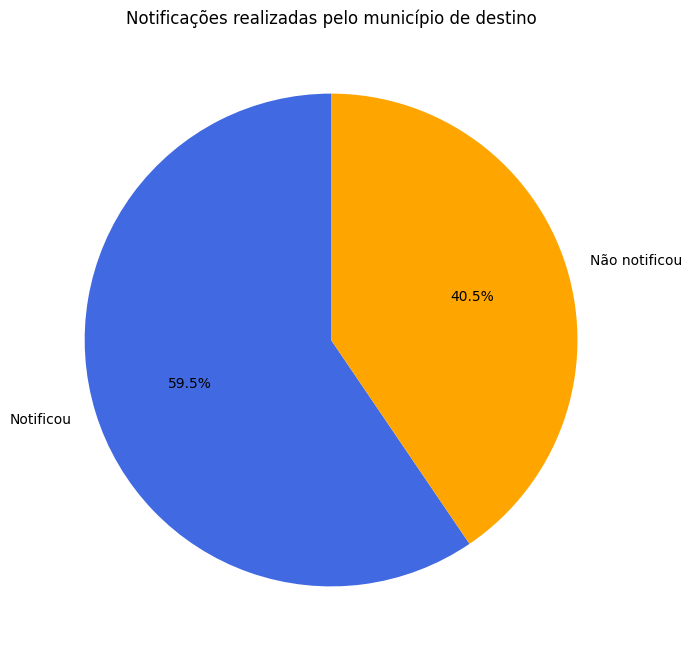

In [ ]:
planilha_renom['Notificado'] = planilha_renom['Notificação no destino'].notna()

contagem_notificados = planilha_renom['Notificado'].value_counts()

rotulos = ['Notificou', 'Não notificou']

cores = ['royalblue', 'orange']

plt.figure(figsize = (8, 8))
plt.pie(contagem_notificados, labels=rotulos, autopct = '%1.1f%%', colors = cores, startangle = 90)
plt.title('Notificações realizadas pelo município de destino')
plt.show()

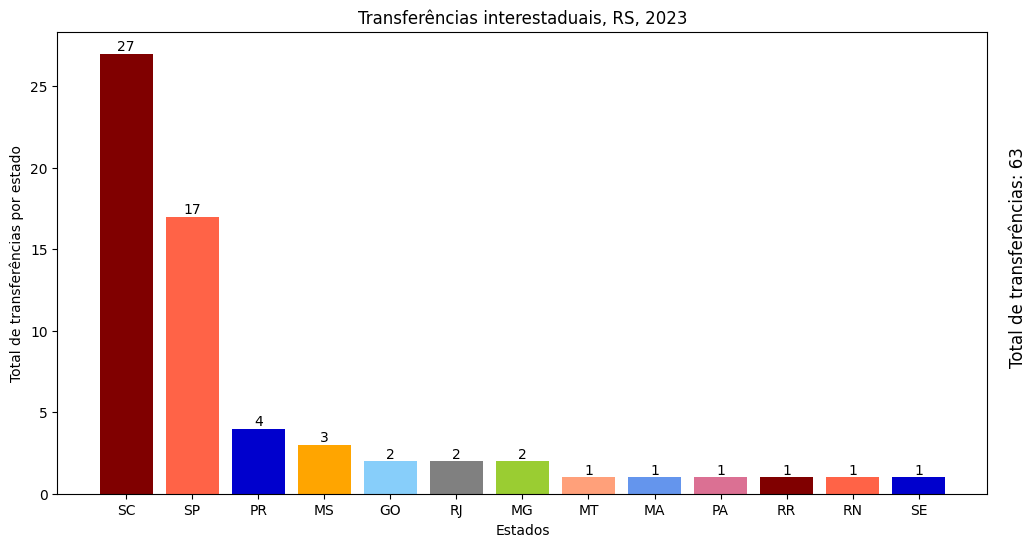

In [ ]:
def extrair_estados(string):
    estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'SC', 'SE', 'SP', 'TO']
    encontrados = [estado for estado in estados if estado in str(string)]
    return encontrados

planilha_renom['Siglas de Estado'] = planilha_renom.apply(lambda row: extrair_estados(row['Município de origem'] + row['Município de destino']), axis = 1)

contagem_estados = Counter([estado for estados in planilha_renom['Siglas de Estado'] for estado in estados])

estados, contagens = zip(*contagem_estados.items())

estados, contagens = zip(*sorted(zip(estados, contagens), key = lambda x: x[1], reverse = True))

cores = ['maroon', 'tomato', 'mediumblue', 'orange', 'lightskyblue', 'gray', 'yellowgreen', 'lightsalmon', 'cornflowerblue', 'palevioletred']

plt.figure(figsize = (12, 6))
bars = plt.bar(estados, contagens, color = cores)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha = 'center', va = 'bottom')

    total_transferencias_interestaduais = sum(contagens)
plt.text(len(estados) + 0.5, 14.5, f'Total de transferências: {total_transferencias_interestaduais}', ha = 'center', va = 'center', fontsize = 12, color = 'black', rotation = 90)

plt.title('Transferências interestaduais, RS, 2023')
plt.xlabel('Estados')
plt.ylabel('Total de transferências por estado')
plt.show()